We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
#!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-24 12:59:42--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.78, 13.227.223.117, 13.227.223.89, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.78|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', na_filter=False)
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-24,24,5,2020,782,11,Afghanistan,AF,AFG,37172386,Asia
1,2020-05-23,23,5,2020,540,12,Afghanistan,AF,AFG,37172386,Asia
2,2020-05-22,22,5,2020,531,6,Afghanistan,AF,AFG,37172386,Asia
3,2020-05-21,21,5,2020,492,9,Afghanistan,AF,AFG,37172386,Asia
4,2020-05-20,20,5,2020,581,5,Afghanistan,AF,AFG,37172386,Asia
5,2020-05-19,19,5,2020,408,4,Afghanistan,AF,AFG,37172386,Asia
6,2020-05-18,18,5,2020,262,1,Afghanistan,AF,AFG,37172386,Asia
7,2020-05-17,17,5,2020,0,0,Afghanistan,AF,AFG,37172386,Asia
8,2020-05-16,16,5,2020,1063,32,Afghanistan,AF,AFG,37172386,Asia
9,2020-05-15,15,5,2020,113,6,Afghanistan,AF,AFG,37172386,Asia


To make room in the dataframe for future predictions, we add columns for those values and set them to missing for now.

In [4]:
df['pcases']  = np.nan
df['pdeaths'] = np.nan

Last check of our source dataframe.

In [5]:
df.count()

dateRep                    19037
day                        19037
month                      19037
year                       19037
cases                      19037
deaths                     19037
countriesAndTerritories    19037
geoId                      19037
countryterritoryCode       19037
popData2018                19037
continentExp               19037
pcases                         0
pdeaths                        0
dtype: int64

We pivot to a country by column format.

In [6]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths', 'pcases', 'pdeaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-20   0.0  873.0  581.0  0.0  0.0   1.0  218.0  2.0  438.0  78.0  ...   
2020-05-21   1.0  941.0  492.0  0.0  0.0  15.0  230.0  2.0  474.0  18.0  ...   
2020-05-22   0.0  894.0  531.0  0.0  0.0   5.0  335.0  6.0  648.0  57.0  ...   
2020-05-23   0.0  994.0  540.0  0.0  0.0  12.0  322.0  2.0  718.0  29.0  ...   
2020-05-24   0.0  812.0  782.0  0.0  0.0   8.0  374.0  0.0  704.0  46.0  ...   

           pdeaths                                      
geoId           VC  VE  VG  VI  VN  XK  YE  ZA  ZM  ZW  
dateRep                                                 
2019-12-31     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-01     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-02     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-03     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-04     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...            ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  
2020-05-20     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-21     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-22     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-23     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-24     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[146 rows x 840 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add three months and check our latest date.

In [7]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('91 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... pdeaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...      VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...     ...  ..  ..   
2020-08-19   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-08-20   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-08-21   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-08-22   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-08-23   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   

                                        
geoId       VI  VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN NaN NaN NaN NaN NaN NaN  
2020-01-01 NaN NaN NaN NaN NaN NaN NaN  
2020-01-02 NaN NaN NaN NaN NaN NaN NaN  
2020-01-03 NaN NaN NaN NaN NaN NaN NaN  
2020-01-04 NaN NaN NaN NaN NaN NaN NaN  
...         ..  ..  ..  ..  ..  ..  ..  
2020-08-19 NaN NaN NaN NaN NaN NaN NaN  
2020-08-20 NaN NaN NaN NaN NaN NaN NaN  
2020-08-21 NaN NaN NaN NaN NaN NaN NaN  
2020-08-22 NaN NaN NaN NaN NaN NaN NaN  
2020-08-23 NaN NaN NaN NaN NaN NaN NaN  

[237 rows x 840 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [8]:
df_geo['dateRep'] = df_geo.index
df_geo['daynum'] = (df_geo['dateRep'] - pd.Timestamp('2019-01-01')).dt.days.astype('int')
df_geo['daynum'].describe()

count    237.000000
mean     482.000000
std       68.560193
min      364.000000
25%      423.000000
50%      482.000000
75%      541.000000
max      600.000000
Name: daynum, dtype: float64

Now for some modeling! The _curve_ can also be interpreted as a smoothed version of the new arriving cases, because using the sum over the last 14 days is just the mean times 14. It has the general shape of a gaussian curve, based on the underlying probability distribution of the disease spread. Gaussian curves have the nice property that the logarithm is a parabola, as we can check for a couple of countries.

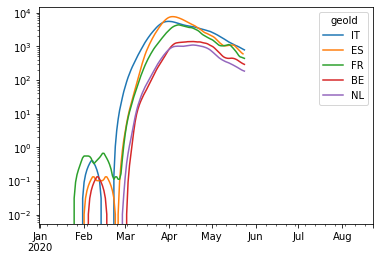

In [9]:
df_geo['cases'][['IT', 'ES', 'FR', 'BE', 'NL']].rolling(14, win_type='triang').mean().plot(logy=True)

Let's start with __NL__. We create a simple dataframe to contain the source values for our fitting algorithm, initially with a rolling window to smooth out the target because of the reporting cycle where many of the cases over the weekend end up in the reported data for Tuesdays and Wednesdays. Eventually the results seem better without smoothing, including more precise quality measures. To ignore the noise of early cases before the outbreak we select only those days where the number is above 100 and take the logarithm.

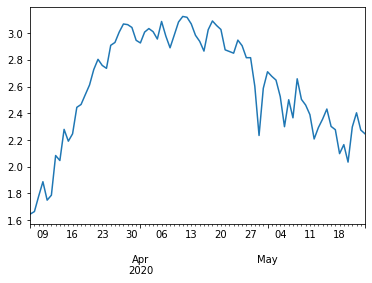

In [10]:
country  = 'NL'
measure  = 'cases'
pmeasure = 'pcases'

df_pred = pd.DataFrame({'x':df_geo['daynum'], 'y':df_geo[measure][country]})
df_pred = df_pred[df_pred['y'] > 10]
df_pred['y'] = np.log10(df_pred['y'])
df_pred['y'].plot()

Because our input is now a parabola, the first derivative should be a line. We can check that with a `gradient` function.

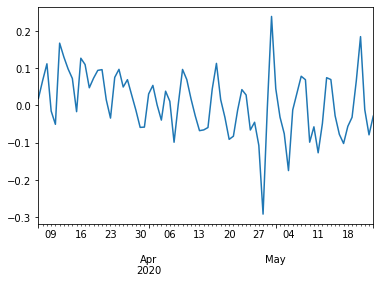

In [11]:
df_pred['g'] = np.gradient(df_pred['y'])
df_pred['g'].plot()

With `polyfit` we check if we can fit a line.

NL factors [-0.00125817  0.59817663] residuals 0.4923053177715786


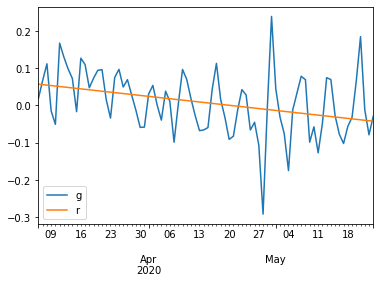

In [12]:
fit = np.polyfit(x=df_pred['x'], y=df_pred['g'], deg=1, full=True)
print(country, "factors", fit[0], "residuals", fit[1][0])

df_pred['r'] = np.polyval(fit[0], df_pred['x'])
df_pred[['g', 'r']].plot()

Now we can use polynomial regression to estimate the curve with `polyfit`. We are looking for a parabola, so we use a second order approximation. The outputs are factors a, b, and c for the function `ax^2 + bx + c`. The `polyfit` function cannot handle missing values, but they are already filtered out in the selection for `y` above.

NL factors [-7.44583239e-04  6.99513981e-01 -1.61292533e+02] residuals 2.6061087258124327


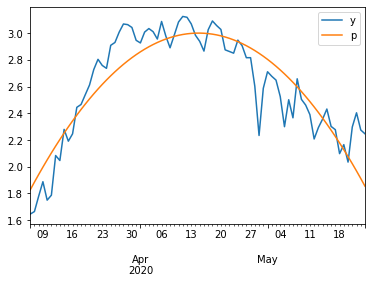

In [29]:
fit = np.polyfit(x=df_pred['x'], y=df_pred['y'], deg=2, full=True)
print(country, "factors", fit[0], "residuals", fit[1][0])

df_pred['p'] = np.polyval(fit[0], df_pred['x'])
df_pred[['y', 'p']].plot()

The `polyval` function takes the results of `polyfit` factors and applies them to input data. Once we have the resulting values, we take the exponential to find the estimated curve.

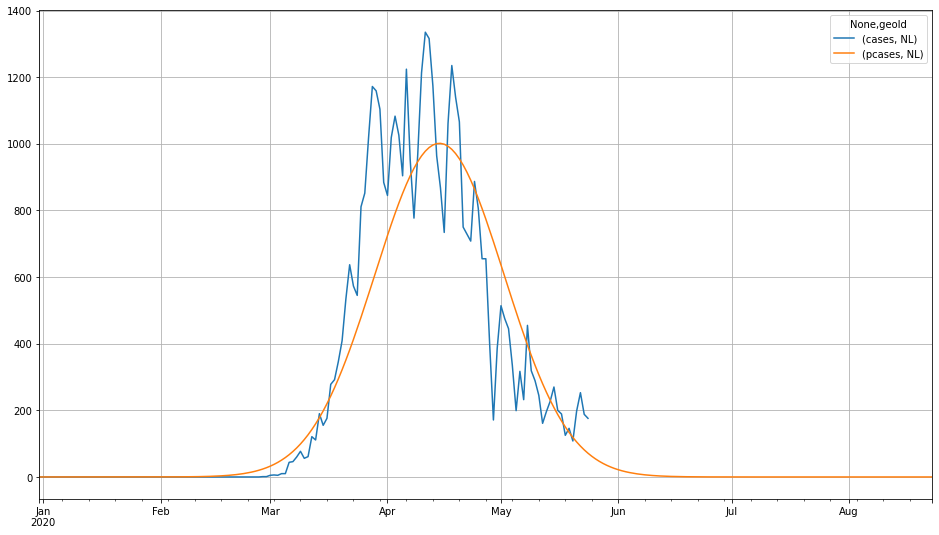

In [30]:
df_geo[(pmeasure, country)] = 10 ** np.polyval(fit[0], df_geo['daynum'])
df_geo[[(measure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

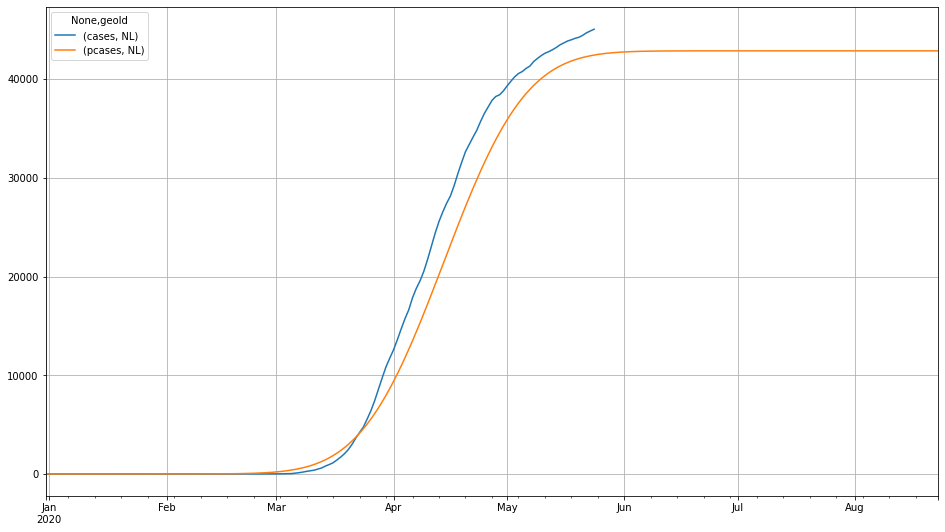

In [31]:
df_geo[[(measure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

In [32]:
df_geo[pmeasure][country].cumsum().tail(1).astype(int)

2020-08-23    42870
Freq: D, Name: NL, dtype: int64

Keep exploring! Stay home, wash your hands, keep your distance.